In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
file_path = 'Employee.csv'  
df = pd.read_csv(file_path)

In [4]:
#Data Exploration:
print(df.head())

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print("Unique Values:", df[col].unique())
    print("Number of Unique Values:", df[col].nunique())


Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 40

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2


In [7]:
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [13]:
#Data Cleaning
df['Age'] = df['Age'].replace(0, np.nan)
df = df.drop_duplicates()

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [16]:
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

In [17]:
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [18]:
outliers_age = find_outliers(df['Age'])
outliers_salary = find_outliers(df['Salary'])

print("\nOutliers in Age:\n", outliers_age)
print("\nOutliers in Salary:\n", outliers_salary)


Outliers in Age:
 Series([], Name: Age, dtype: float64)

Outliers in Salary:
 Series([], Name: Salary, dtype: float64)


In [19]:
# Data Analysis
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("Filtered Data (Age > 40 and Salary < 5000):")
print(filtered_df)

Filtered Data (Age > 40 and Salary < 5000):
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


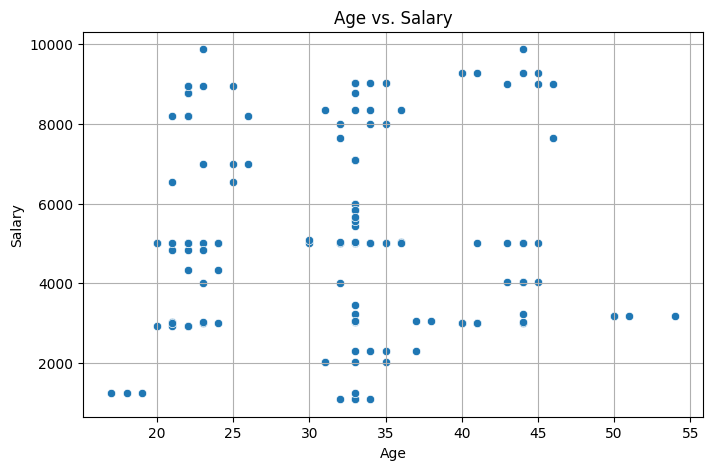

In [21]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title("Age vs. Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


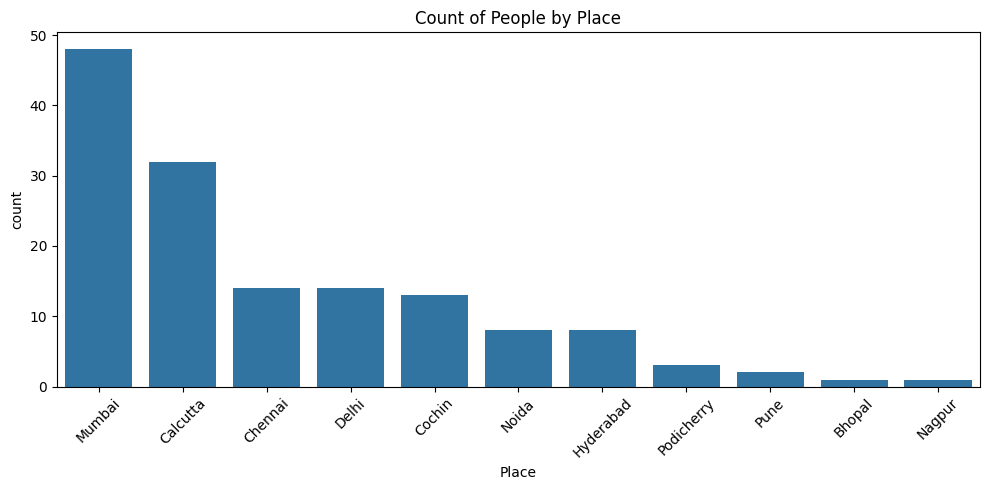

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Place', order=df['Place'].value_counts().index)
plt.title("Count of People by Place")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Data Encoding
encoded_df = df.copy()

In [25]:
le = LabelEncoder()
encoded_df['Company'] = le.fit_transform(encoded_df['Company'])
encoded_df['Place'] = le.fit_transform(encoded_df['Place'])

encoded_df.head()

,Company,Age,Salary,Place,Country,Gender
0,4,20.0,5000.0,2,India,0
1,2,30.0,5000.0,6,India,0
2,4,35.0,2300.0,1,India,0
3,2,40.0,3000.0,4,India,0
4,4,23.0,4000.0,6,India,0


In [27]:
#Feature Scaling
features_to_scale = ['Age', 'Salary']

In [28]:
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(encoded_df[features_to_scale])
standard_df = pd.DataFrame(scaled_standard, columns=['Age_Standard', 'Salary_Standard'])

In [29]:
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(encoded_df[features_to_scale])
minmax_df = pd.DataFrame(scaled_minmax, columns=['Age_MinMax', 'Salary_MinMax'])

In [30]:
encoded_df = encoded_df.join(standard_df).join(minmax_df)

encoded_df.head()

,Company,Age,Salary,Place,Country,Gender,Age_Standard,Salary_Standard,Age_MinMax,Salary_MinMax
0,4,20.0,5000.0,2,India,0,-1.484676,-0.100827,0.081081,0.445089
1,2,30.0,5000.0,6,India,0,-0.267174,-0.100827,0.351351,0.445089
2,4,35.0,2300.0,1,India,0,0.341577,-1.243735,0.486486,0.137817
3,2,40.0,3000.0,4,India,0,0.950328,-0.947426,0.621622,0.217480
4,4,23.0,4000.0,6,India,0,-1.119426,-0.524127,0.162162,0.331285
